In [229]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

In [230]:
STEPS = 50

In [231]:
class Persona:
    """Iterador para simular el random_walk de una persona."""
    q_persona = 0
    
    def __init__(self, x_inicial, y_inicial, verbose=False):
        self.recorrido_x = []
        self.recorrido_y = []
        self.steps = -1
        self.next_x = x_inicial
        self.next_y = y_inicial
        self.factor = 2
        self.verbose = verbose
        self.numero = Persona.q_persona
        Persona.q_persona += 1
        
    def __iter__(self):
        return self
    
    def __next_step(self):
        """Esta funcion deberia calcular bien el step aleatorio"""
        r = np.random.uniform(0, 0.4, 2)
#         print("Factor es {0}".format(self.factor))
        if r[0] <= 0.2:
            return r[1] * self.factor
        else:
            return -r[1] * self.factor

    def __next__(self):
        self.recorrido_x.append(self.next_x)
        self.recorrido_y.append(self.next_y)
        x_old = self.next_x 
        y_old = self.next_y
        self.next_x += self.__next_step()
        self.next_y += self.__next_step()
        self.steps += 1
        if self.verbose:
            print("({}) Posicion x: {}".format(self.numero, x_old))
            print("({}) Posicion y: {}".format(self.numero, y_old))
        return x_old, y_old
    
    def set_factor(self, x):
        self.factor = x

In [232]:
class PersonaC(Persona):
    def __init__(self, x_inicial, y_inicial, verbose=False):
        super().__init__(x_inicial, y_inicial, verbose)
        self.tipo = 'C'
        self.hex_color = '#49111C'
        self.set_factor(4)
    
class PersonaB(Persona):
    def __init__(self, x_inicial, y_inicial, verbose=False):
        super().__init__(x_inicial, y_inicial, verbose)
        self.tipo = 'B'
        self.hex_color = '#FF5A5F'
        self.set_factor(2)
    
class PersonaA(Persona):
    def __init__(self, x_inicial, y_inicial, verbose=False):
        super().__init__(x_inicial, y_inicial, verbose)
        self.tipo = 'A'
        self.hex_color = '#BFD7EA'
        self.set_factor(1)

In [233]:
persona = PersonaC(0, 0, verbose=True)
next(persona)
next(persona)

(0) Posicion x: 0
(0) Posicion y: 0
(0) Posicion x: -1.5601609148838333
(0) Posicion y: -1.150613805539858


(-1.5601609148838333, -1.150613805539858)

In [234]:
# def random_walk(posicion_inicial, n_steps):
#     pos = posicion_inicial
#     for i in range(0, n_steps):
#         pos = (pos[0] + np.random.rand() * 5, pos[1] + np.random.rand() * 5)
#         yield pos

In [235]:
# def animate_person(x_init, y_init, line, verbose=False):
#     persona = Persona(x_init, y_init, verbose)
#     def animate(i):
#         """Animation function"""
#         # appending new points to x, y axes points list
#         next(persona)
#         line.set_data(persona.recorrido_x, persona.recorrido_y)
#         return line,
#     return animate

In [236]:
def generate_persons(pos, verbose):
    persons = []
    n = np.random.rand(len(pos))
    for (x_init, y_init), ni in zip(pos, n):
        if ni <= 0.1:
            persons.append(PersonaC(x_init, y_init, verbose))
        elif ni > 0.1 and ni <= 0.3:
            persons.append(PersonaB(x_init, y_init, verbose))
        else:
            persons.append(PersonaA(x_init, y_init, verbose))
    return persons

def animate_n_persons(n_persons, lines, pos, verbose=False):
    assert n_persons == len(lines)
    assert n_persons == len(pos)
    persons = generate_persons(pos, verbose)
    def animate_persons(i):
        new_lines = []
        for person, line in zip(persons, lines):
            x, y = next(person)
            #line.set_data(person.recorrido_x, person.recorrido_y)
            line.set_data([x], [y])
            line.set_color(person.hex_color)
            new_lines.append(line)
        return new_lines
    return animate_persons

In [237]:
def gen_lines(ax, n_personas):
    cmap = plt.cm.get_cmap('hsv', n_personas)
    #lines = [ax.plot([], [], lw=2, color=cmap(n))[0] for n in range(n_personas)]
    #lines = [ax.plot([], [], marker='o', c=cmap(n))[0] for n in range(n_personas)]
    lines = [ax.plot([], [], marker='o')[0] for n in range(n_personas)]
    return lines

In [238]:
N = 62500*2
RANGE = 250
flat_data = list(np.random.uniform(0, 0.4, N))
print(len(flat_data))

P = []
for i in range (0, RANGE):
    for j in range (0, RANGE):
        test = np.random.uniform(0, 1, 2)
        if test[0] >= 0.95:
            x = flat_data.pop() + i*0.4
            y = flat_data.pop(-1) + j*0.4
            if test[1] <= 0.1:
                P.append(PersonaC(x, y))
            elif test[1] > 0.1 and test[1] <= 0.3:
                P.append(PersonaB(x, y))
            else:
                P.append(PersonaA(x, y))

init_positions = [(p.next_x, p.next_y) for p in P]
N_PERSONAS = len(P)
print("Ok, y en este caso N es {0}".format(N_PERSONAS))

125000
Ok, y en este caso N es 3215


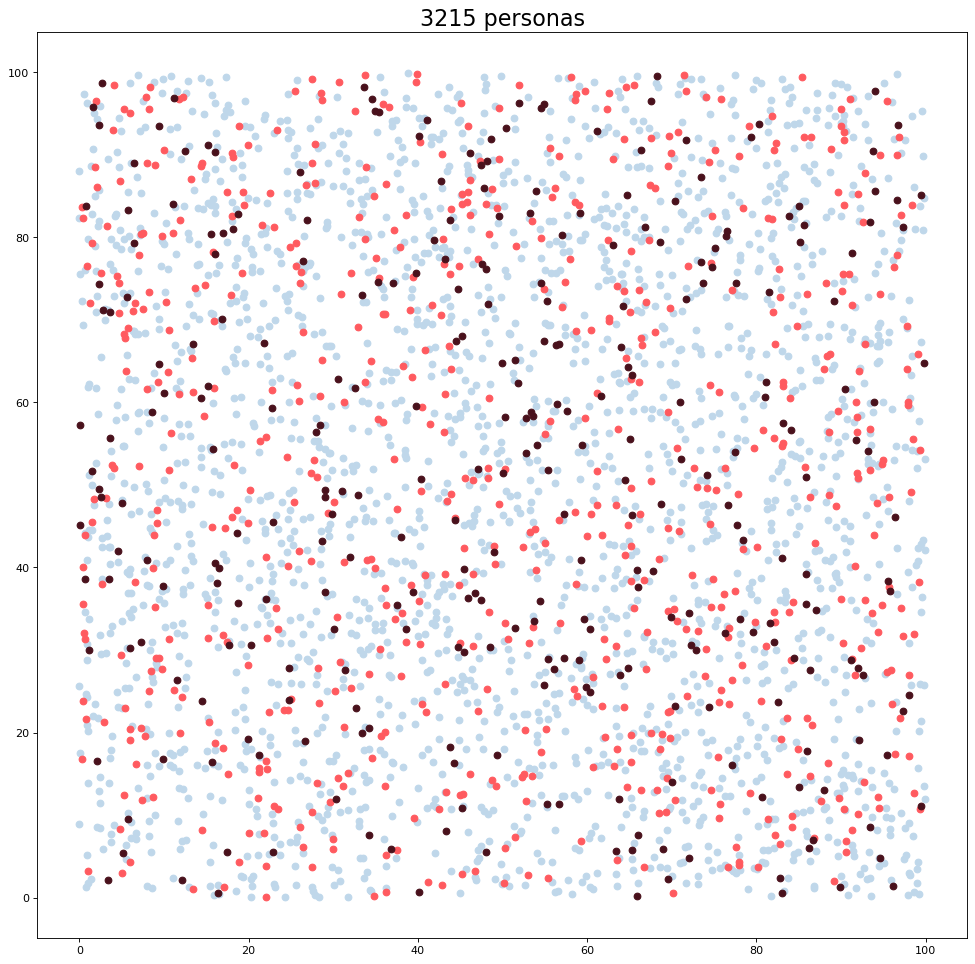

In [239]:
plt.figure(figsize=(15, 15), dpi=80)
plt.title('{0} personas'.format(N_PERSONAS), size=20)
# Si se quiere visualizar la grilla, con un RANGE más chico, por ejemplo 25 #
# plt.xticks([i*0.4 for i in range(0, RANGE+1)])
# plt.yticks([i*0.4 for i in range(0, RANGE+1)])

for tipo, color in {'A': '#BFD7EA', 'B': '#FF5A5F', 'C': '#49111C'}.items():
    X = [p.next_x for p in P if p.tipo == tipo]
    Y = [p.next_y for p in P if p.tipo == tipo]
    plt.scatter(X, Y, color=color)
plt.show()

In [240]:
#Set up ax
fig = plt.figure(figsize=(21, 10))
ax = plt.axes(xlim=(0, 100), ylim=(0, 100)) 
#ax.set_xticks(np.arange(0, STEPS+1, 50))
#ax.set_yticks(np.arange(np.min(persona_1) - 0.5, np.max(persona_1) + 0.5, 0.2))
lines = gen_lines(ax, N_PERSONAS)
ax.set_title('2D Random Walk', fontsize=22)
ax.set_xlabel('Steps', fontsize=18)
ax.set_ylabel('Value', fontsize=18)
ax.tick_params(labelsize=16)
ax.grid(True, which='major', linestyle='--', color='black', alpha=0.4)

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=60, metadata=dict(artist='Me'), bitrate=1800)

# call the animator	 
anim = animation.FuncAnimation(fig, animate_n_persons(N_PERSONAS, lines, init_positions, False),
                               frames=STEPS, interval=295, blit=True)
#anim.save('random_walk.gif',writer='imagemagick')
anim.save('readomwalk.mp4')
plt.close()
"random walk saved"

'random walk saved'